In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Decision Tree

In [2]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [3]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])

[Text(0.7221507352941177, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.457\nsamples = 8134\nvalue = [2868, 5266]\nclass = good'),
 Text(0.4993933823529412, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.448\nsamples = 7726\nvalue = [2617, 5109]\nclass = good'),
 Text(0.3115808823529412, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.461\nsamples = 6680\nvalue = [2412, 4268]\nclass = good'),
 Text(0.17227941176470588, 0.6818181818181818, 'K_cluster_0 <= 0.5\ngini = 0.445\nsamples = 4848\nvalue = [1622, 3226]\nclass = good'),
 Text(0.08897058823529412, 0.5909090909090909, 'genre_Casual <= 0.5\ngini = 0.458\nsamples = 3172\nvalue = [1124, 2048]\nclass = good'),
 Text(0.04647058823529412, 0.5, 'genre_RPG <= 0.5\ngini = 0.468\nsamples = 2196\nvalue = [820, 1376]\nclass = good'),
 Text(0.021176470588235293, 0.4090909090909091, 'original_price <= 82.44\ngini = 0.482\nsamples = 1428\nvalue = [580, 848]\nclass = good'),
 Text(0.018823529411764704, 0.3181818181818

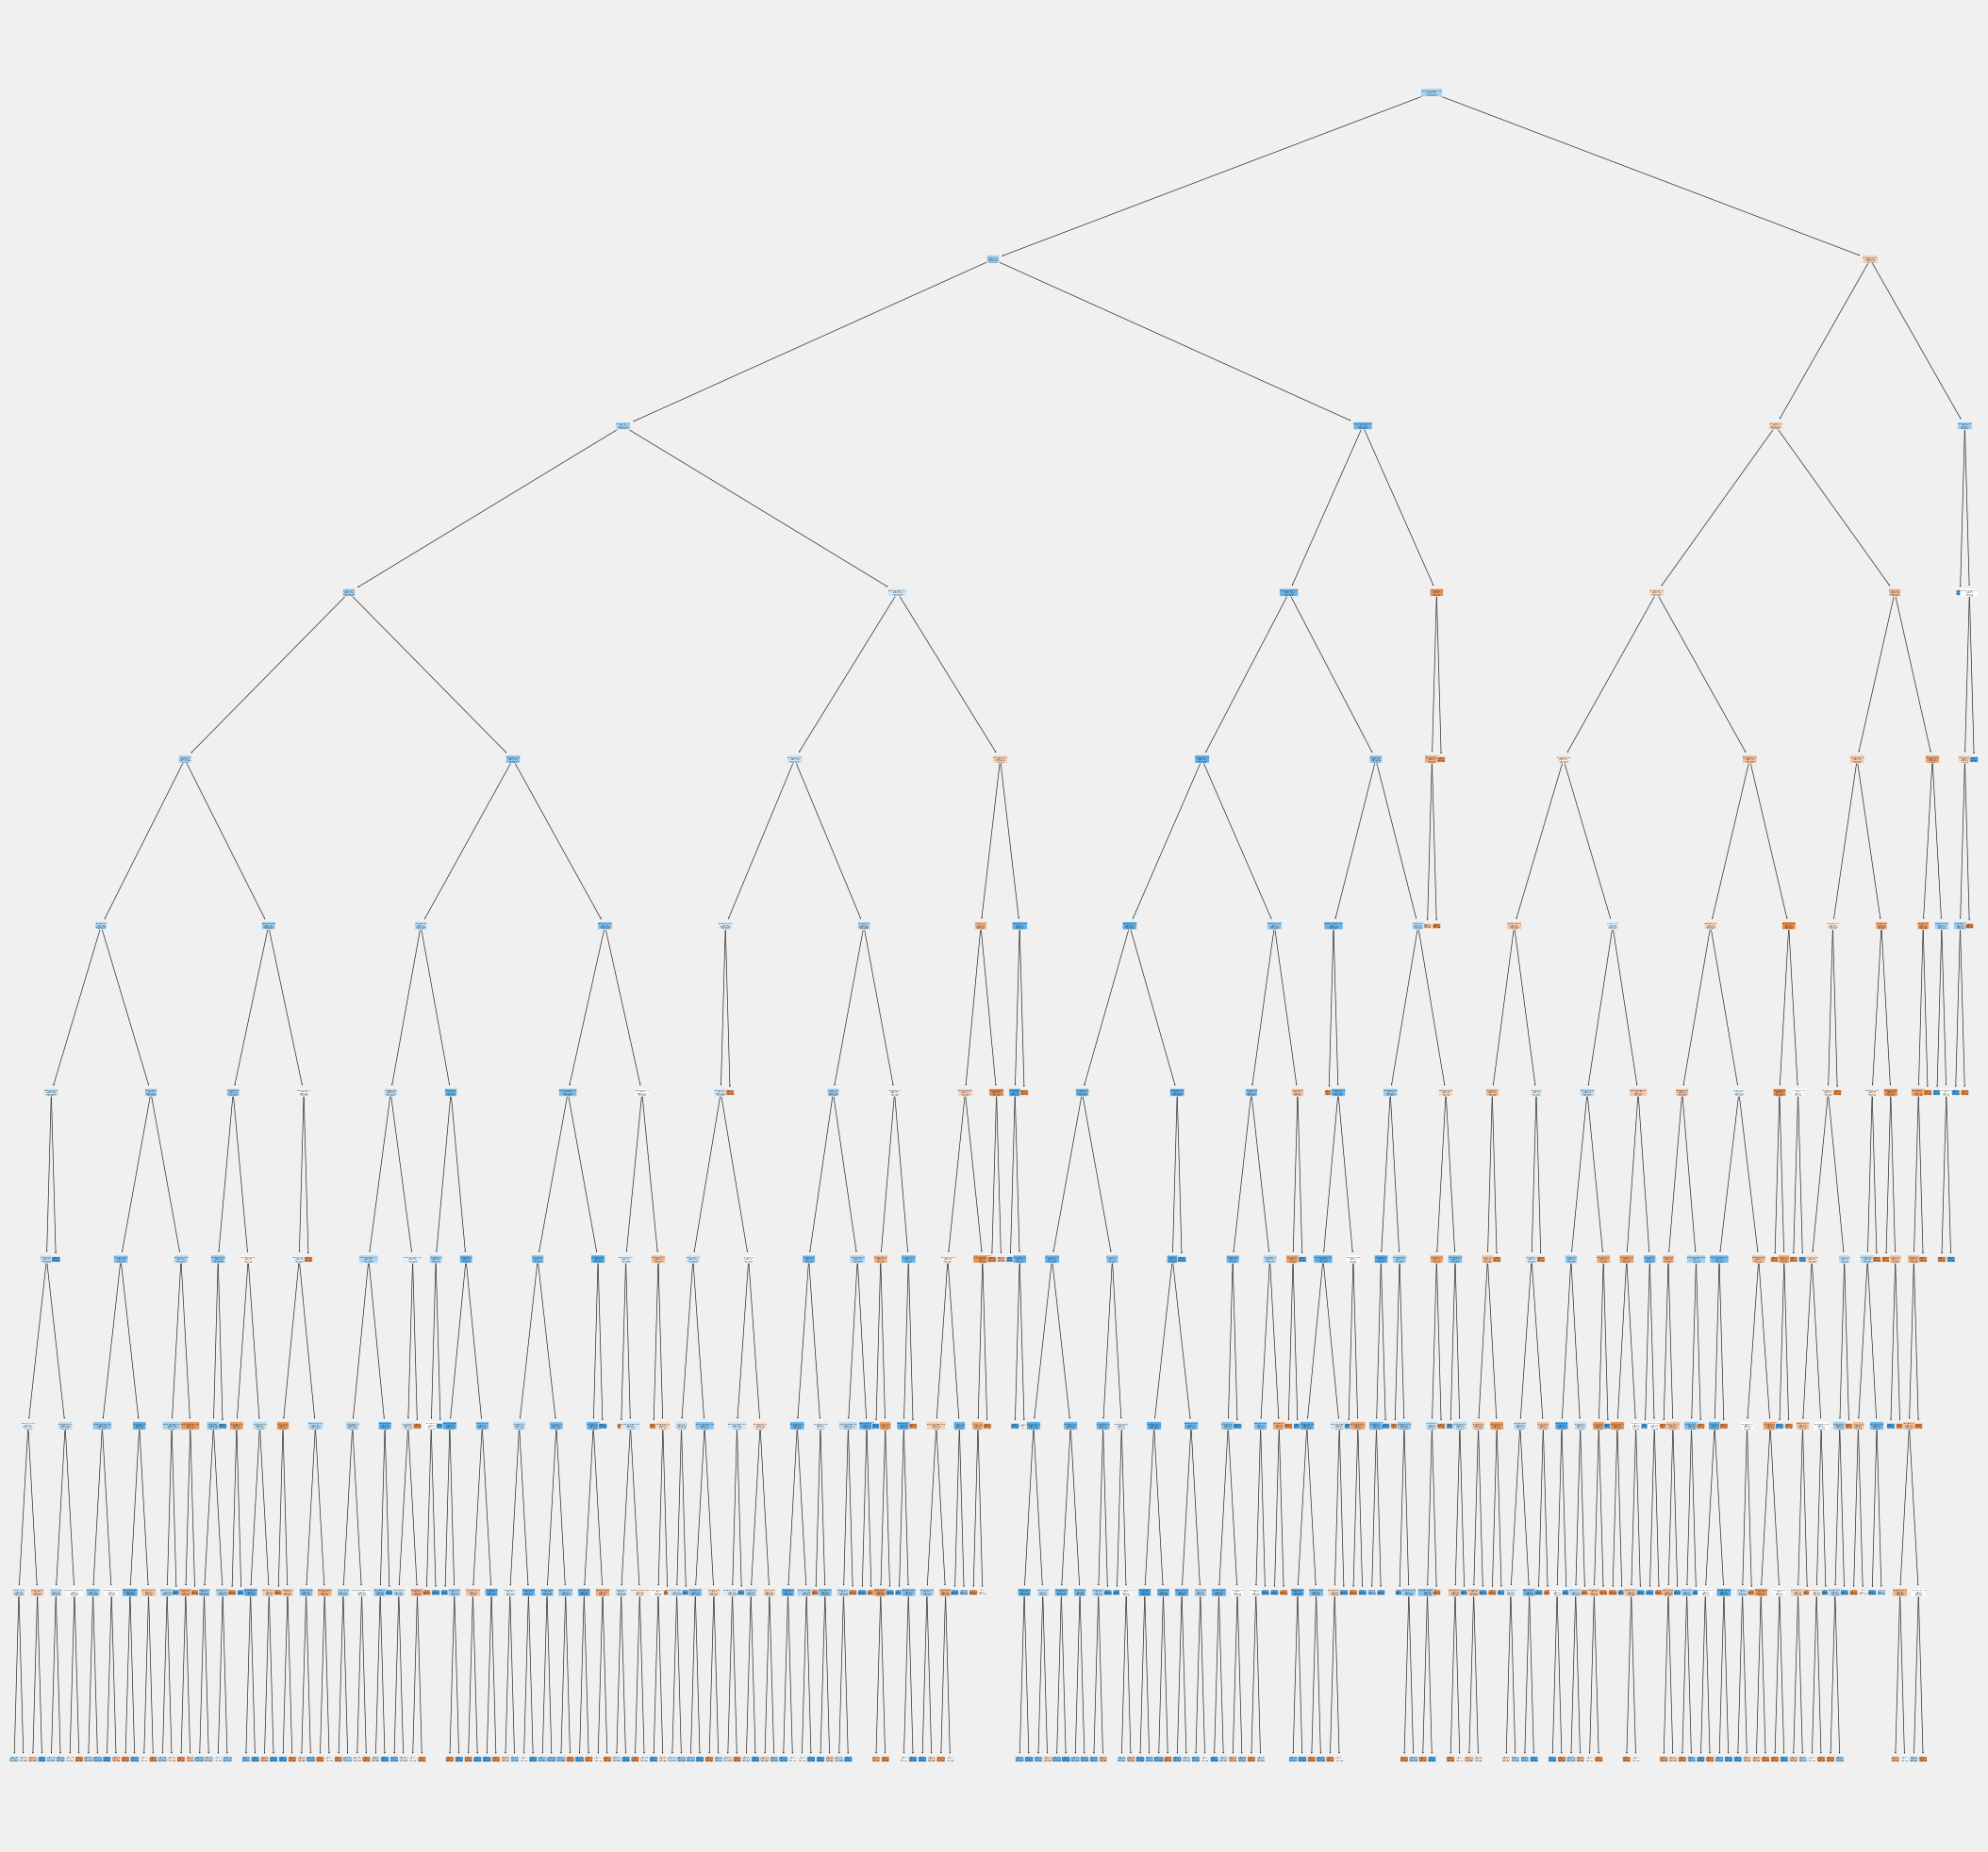

In [4]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])



Train Data
Accuracy  :	 0.6995328251782641

TPR Train :	 0.953475123433346
TNR Train :	 0.23326359832635984

FPR Train :	 0.7667364016736402
FNR Train :	 0.04652487656665401

Precision:	 0.7319474835886215
Recall:   	 0.23326359832635984
F1-score :	 0.35378106821787414


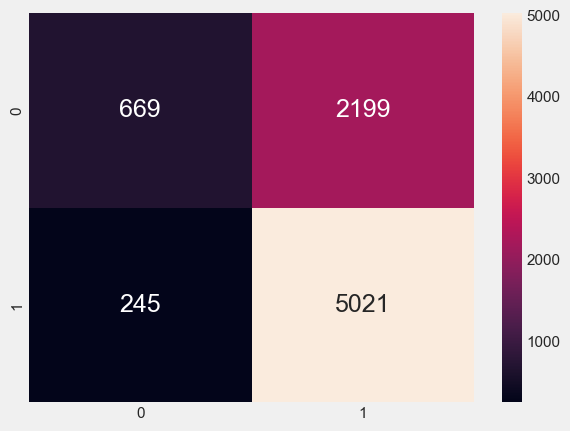

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6643717728055077

TPR Test :	 0.9185639229422067
TNR Test :	 0.18136439267886856

FPR Test :	 0.8186356073211315
FNR Test :	 0.08143607705779335

Precision:	 0.5396039603960396
Recall:   	 0.18136439267886856
F1-score :	 0.2714819427148194


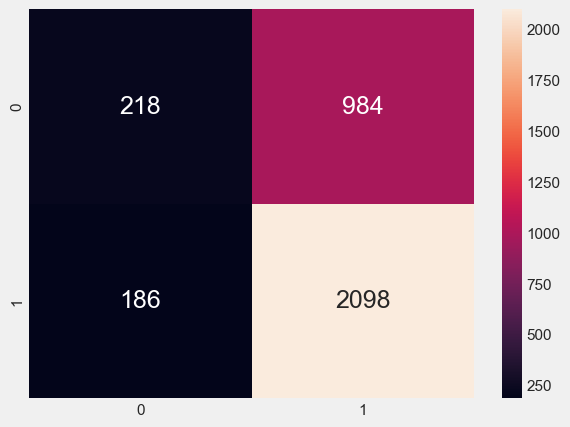

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['original'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `True` vs `False` class imbalance in the response variable `Recommend`. As `Recommend = True` was more likely in the data, *False Positives* are more likely too. This class imbalance is important to resolve as we do not want a biased model. Going back to our problem stated, of idenitfying good/bad games, an important part is on identifying potential bad games as to not let consumers waste money on them. Thus the predicition of bad games is important.

# Decision Tree - Oversampling

In [7]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


[Text(0.706214558678501, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.495\nsamples = 9513\nvalue = [4283, 5230]\nclass = good'),
 Text(0.4916019477317554, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.491\nsamples = 8972\nvalue = [3891, 5081]\nclass = good'),
 Text(0.29434787968441817, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.496\nsamples = 7843\nvalue = [3588, 4255]\nclass = good'),
 Text(0.16469428007889547, 0.6818181818181818, 'K_cluster_0 <= 0.5\ngini = 0.49\nsamples = 5687\nvalue = [2449, 3238]\nclass = good'),
 Text(0.09356508875739646, 0.5909090909090909, 'genre_Action <= 0.5\ngini = 0.496\nsamples = 3719\nvalue = [1685, 2034]\nclass = good'),
 Text(0.04585798816568047, 0.5, 'genre_RPG <= 0.5\ngini = 0.491\nsamples = 2457\nvalue = [1062, 1395]\nclass = good'),
 Text(0.020710059171597635, 0.4090909090909091, 'genre_Casual <= 0.5\ngini = 0.497\nsamples = 1864\nvalue = [855, 1009]\nclass = good'),
 Text(0.009861932938856016, 0.3181818181818182

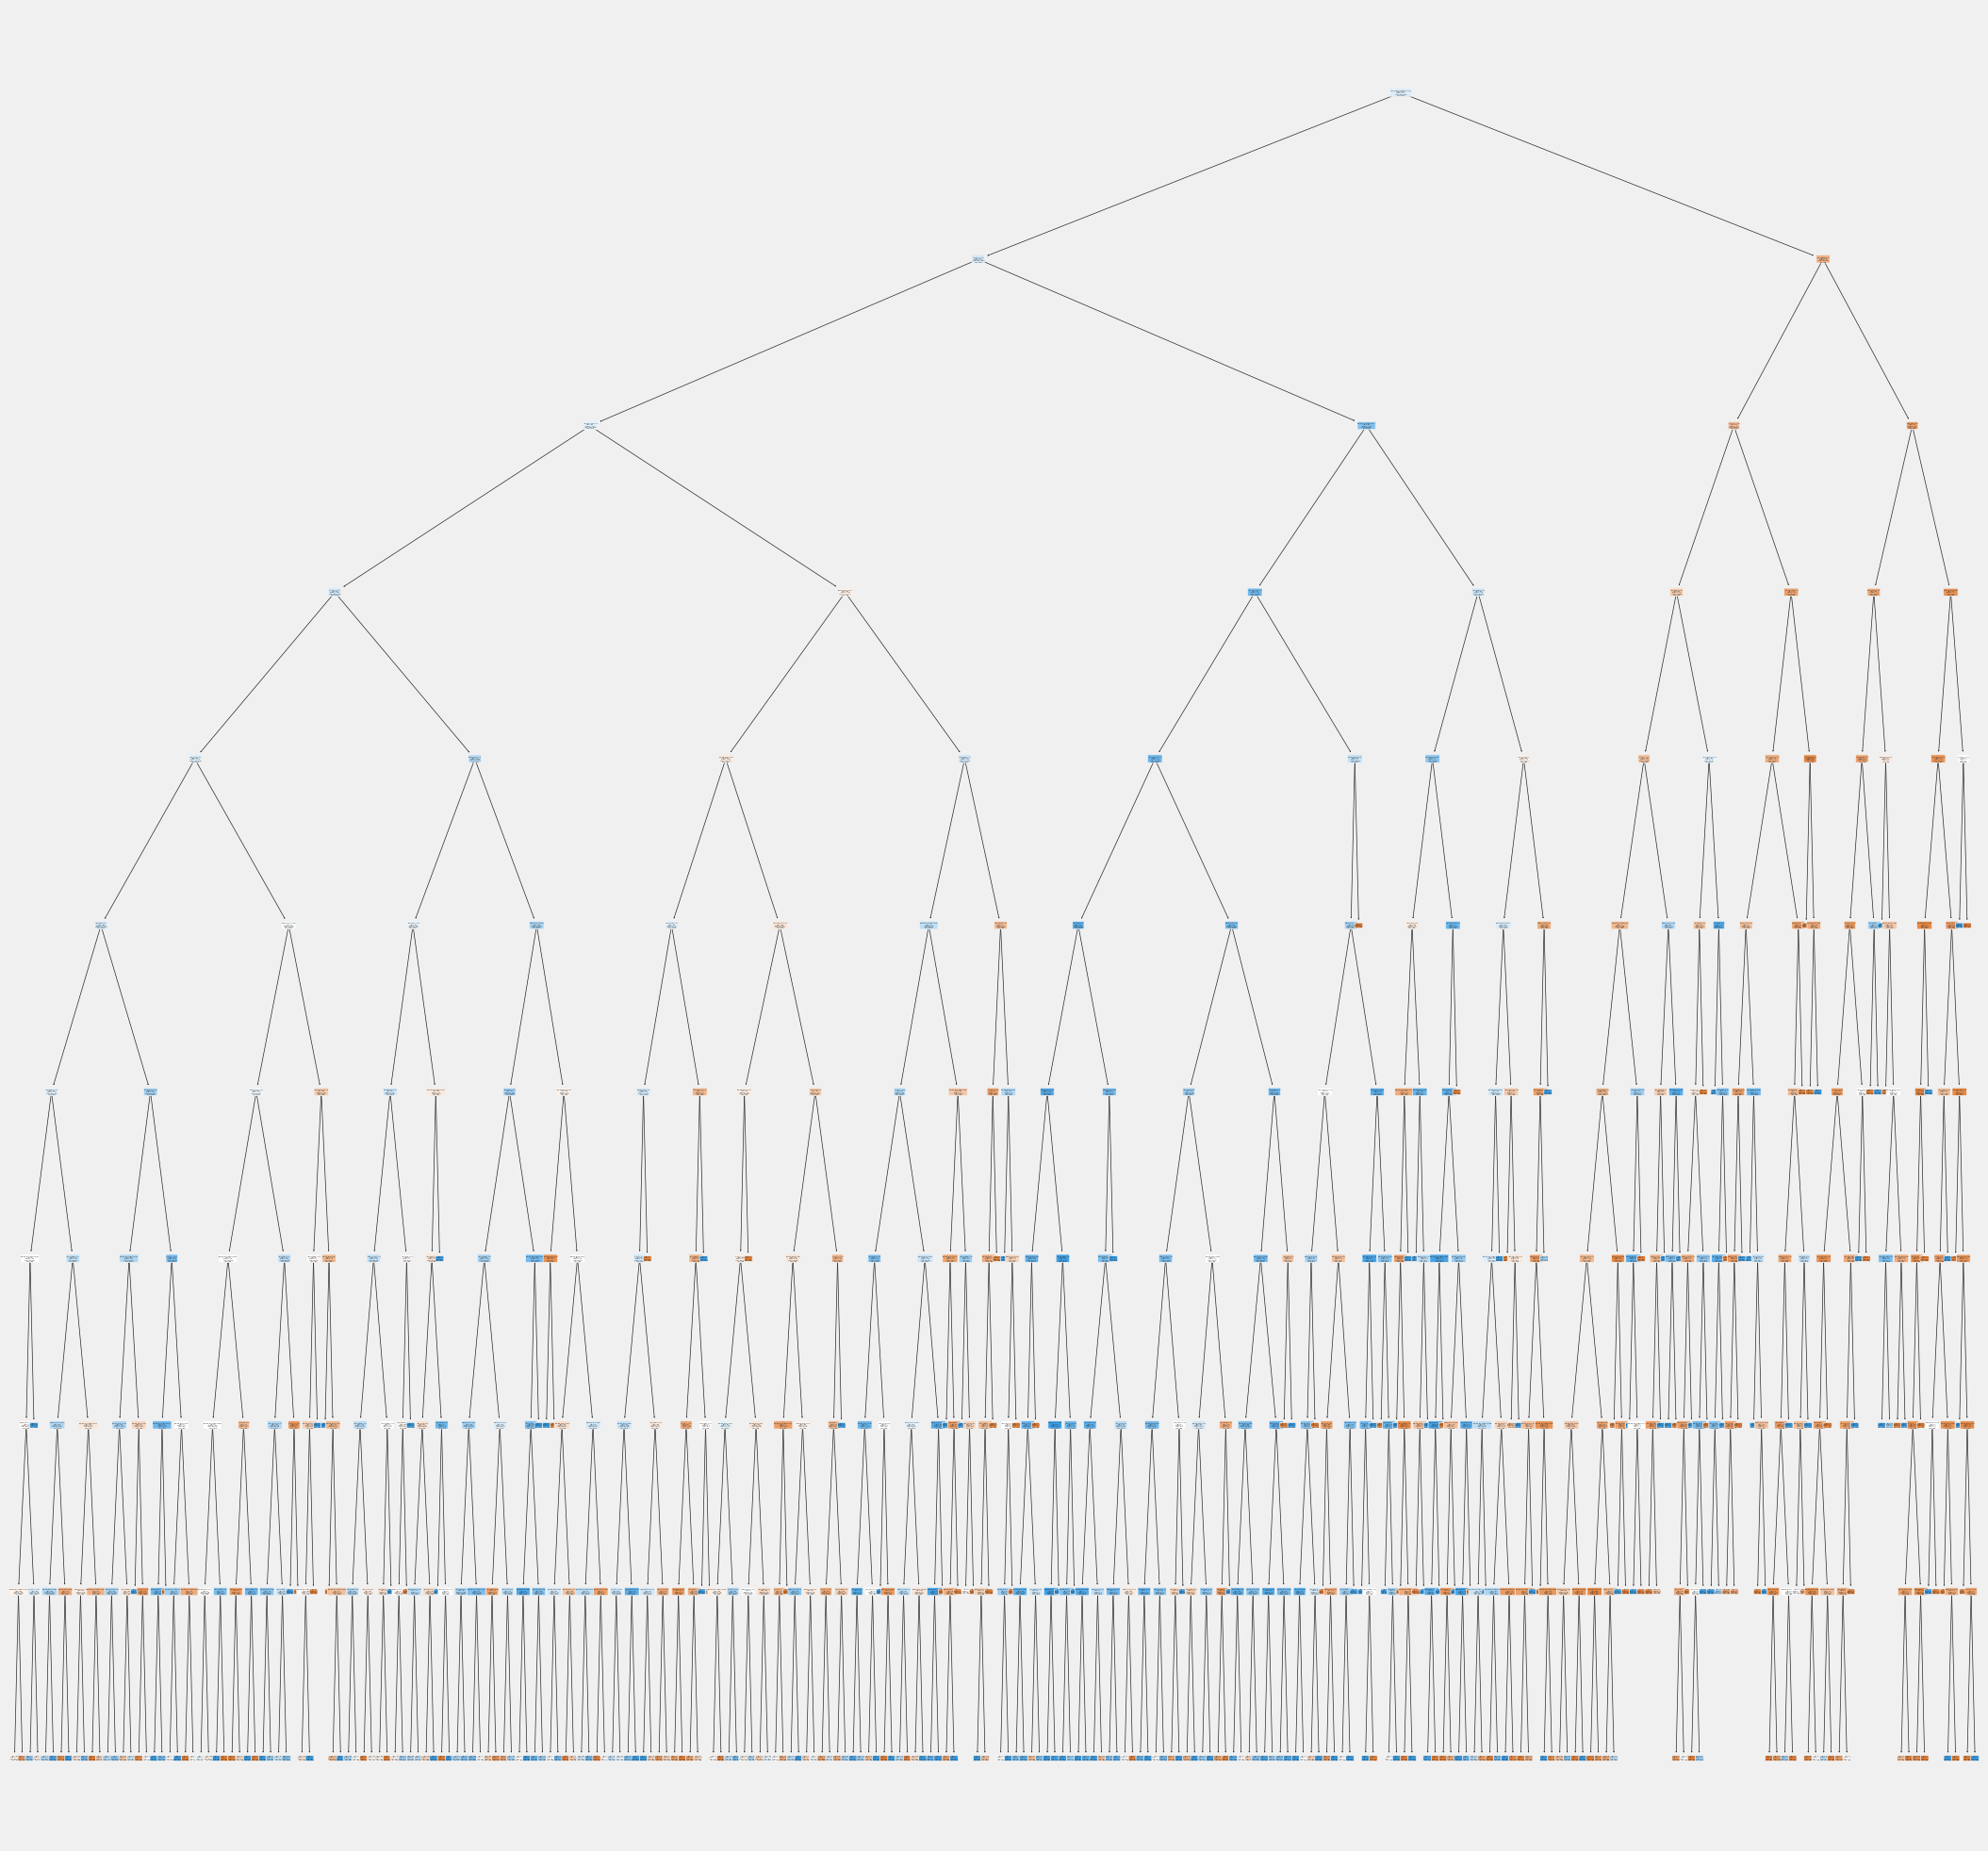

In [8]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6573110480395249

TPR Train :	 0.708604206500956
TNR Train :	 0.5946766285314032

FPR Train :	 0.40532337146859676
FNR Train :	 0.291395793499044

Precision:	 0.6256448047162859
Recall:   	 0.5946766285314032
F1-score :	 0.6097677759157291


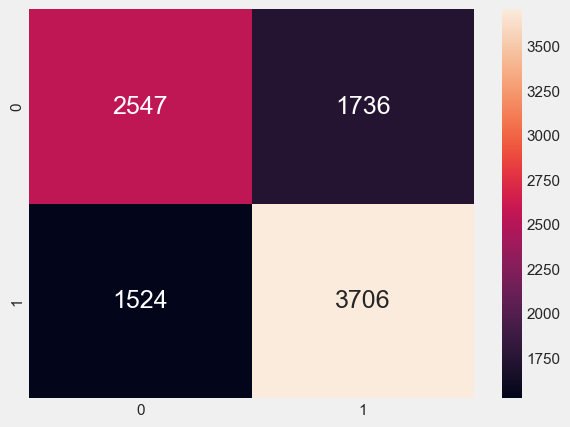

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6009320578857003

TPR Test :	 0.6538793103448276
TNR Test :	 0.5310187820147979

FPR Test :	 0.46898121798520204
FNR Test :	 0.3461206896551724

Precision:	 0.5374423963133641
Recall:   	 0.5310187820147979
F1-score :	 0.5342112797022616


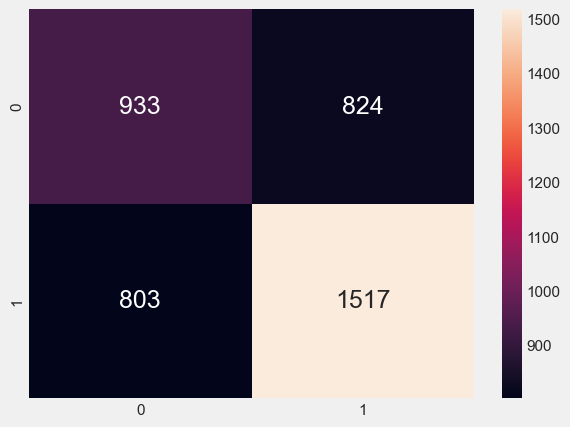

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['oversampled'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]

# Decision Tree - Balanced Sampling

In [11]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


[Text(0.7086077449947313, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.5\nsamples = 10570\nvalue = [5272, 5298]\nclass = good'),
 Text(0.499324947312961, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.499\nsamples = 9895\nvalue = [4751, 5144]\nclass = good'),
 Text(0.3095034246575342, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.5\nsamples = 8690\nvalue = [4388, 4302]\nclass = bad'),
 Text(0.1641859852476291, 0.6818181818181818, 'genre_Strategy <= 0.5\ngini = 0.499\nsamples = 6223\nvalue = [2982, 3241]\nclass = good'),
 Text(0.08785563751317176, 0.5909090909090909, 'K_cluster_0 <= 0.5\ngini = 0.497\nsamples = 4955\nvalue = [2300, 2655]\nclass = good'),
 Text(0.051106427818756586, 0.5, 'original_price <= 136.82\ngini = 0.5\nsamples = 2998\nvalue = [1464, 1534]\nclass = good'),
 Text(0.033192834562697573, 0.4090909090909091, 'original_price <= 29.42\ngini = 0.5\nsamples = 2930\nvalue = [1447, 1483]\nclass = good'),
 Text(0.01685985247629083, 0.3181818181

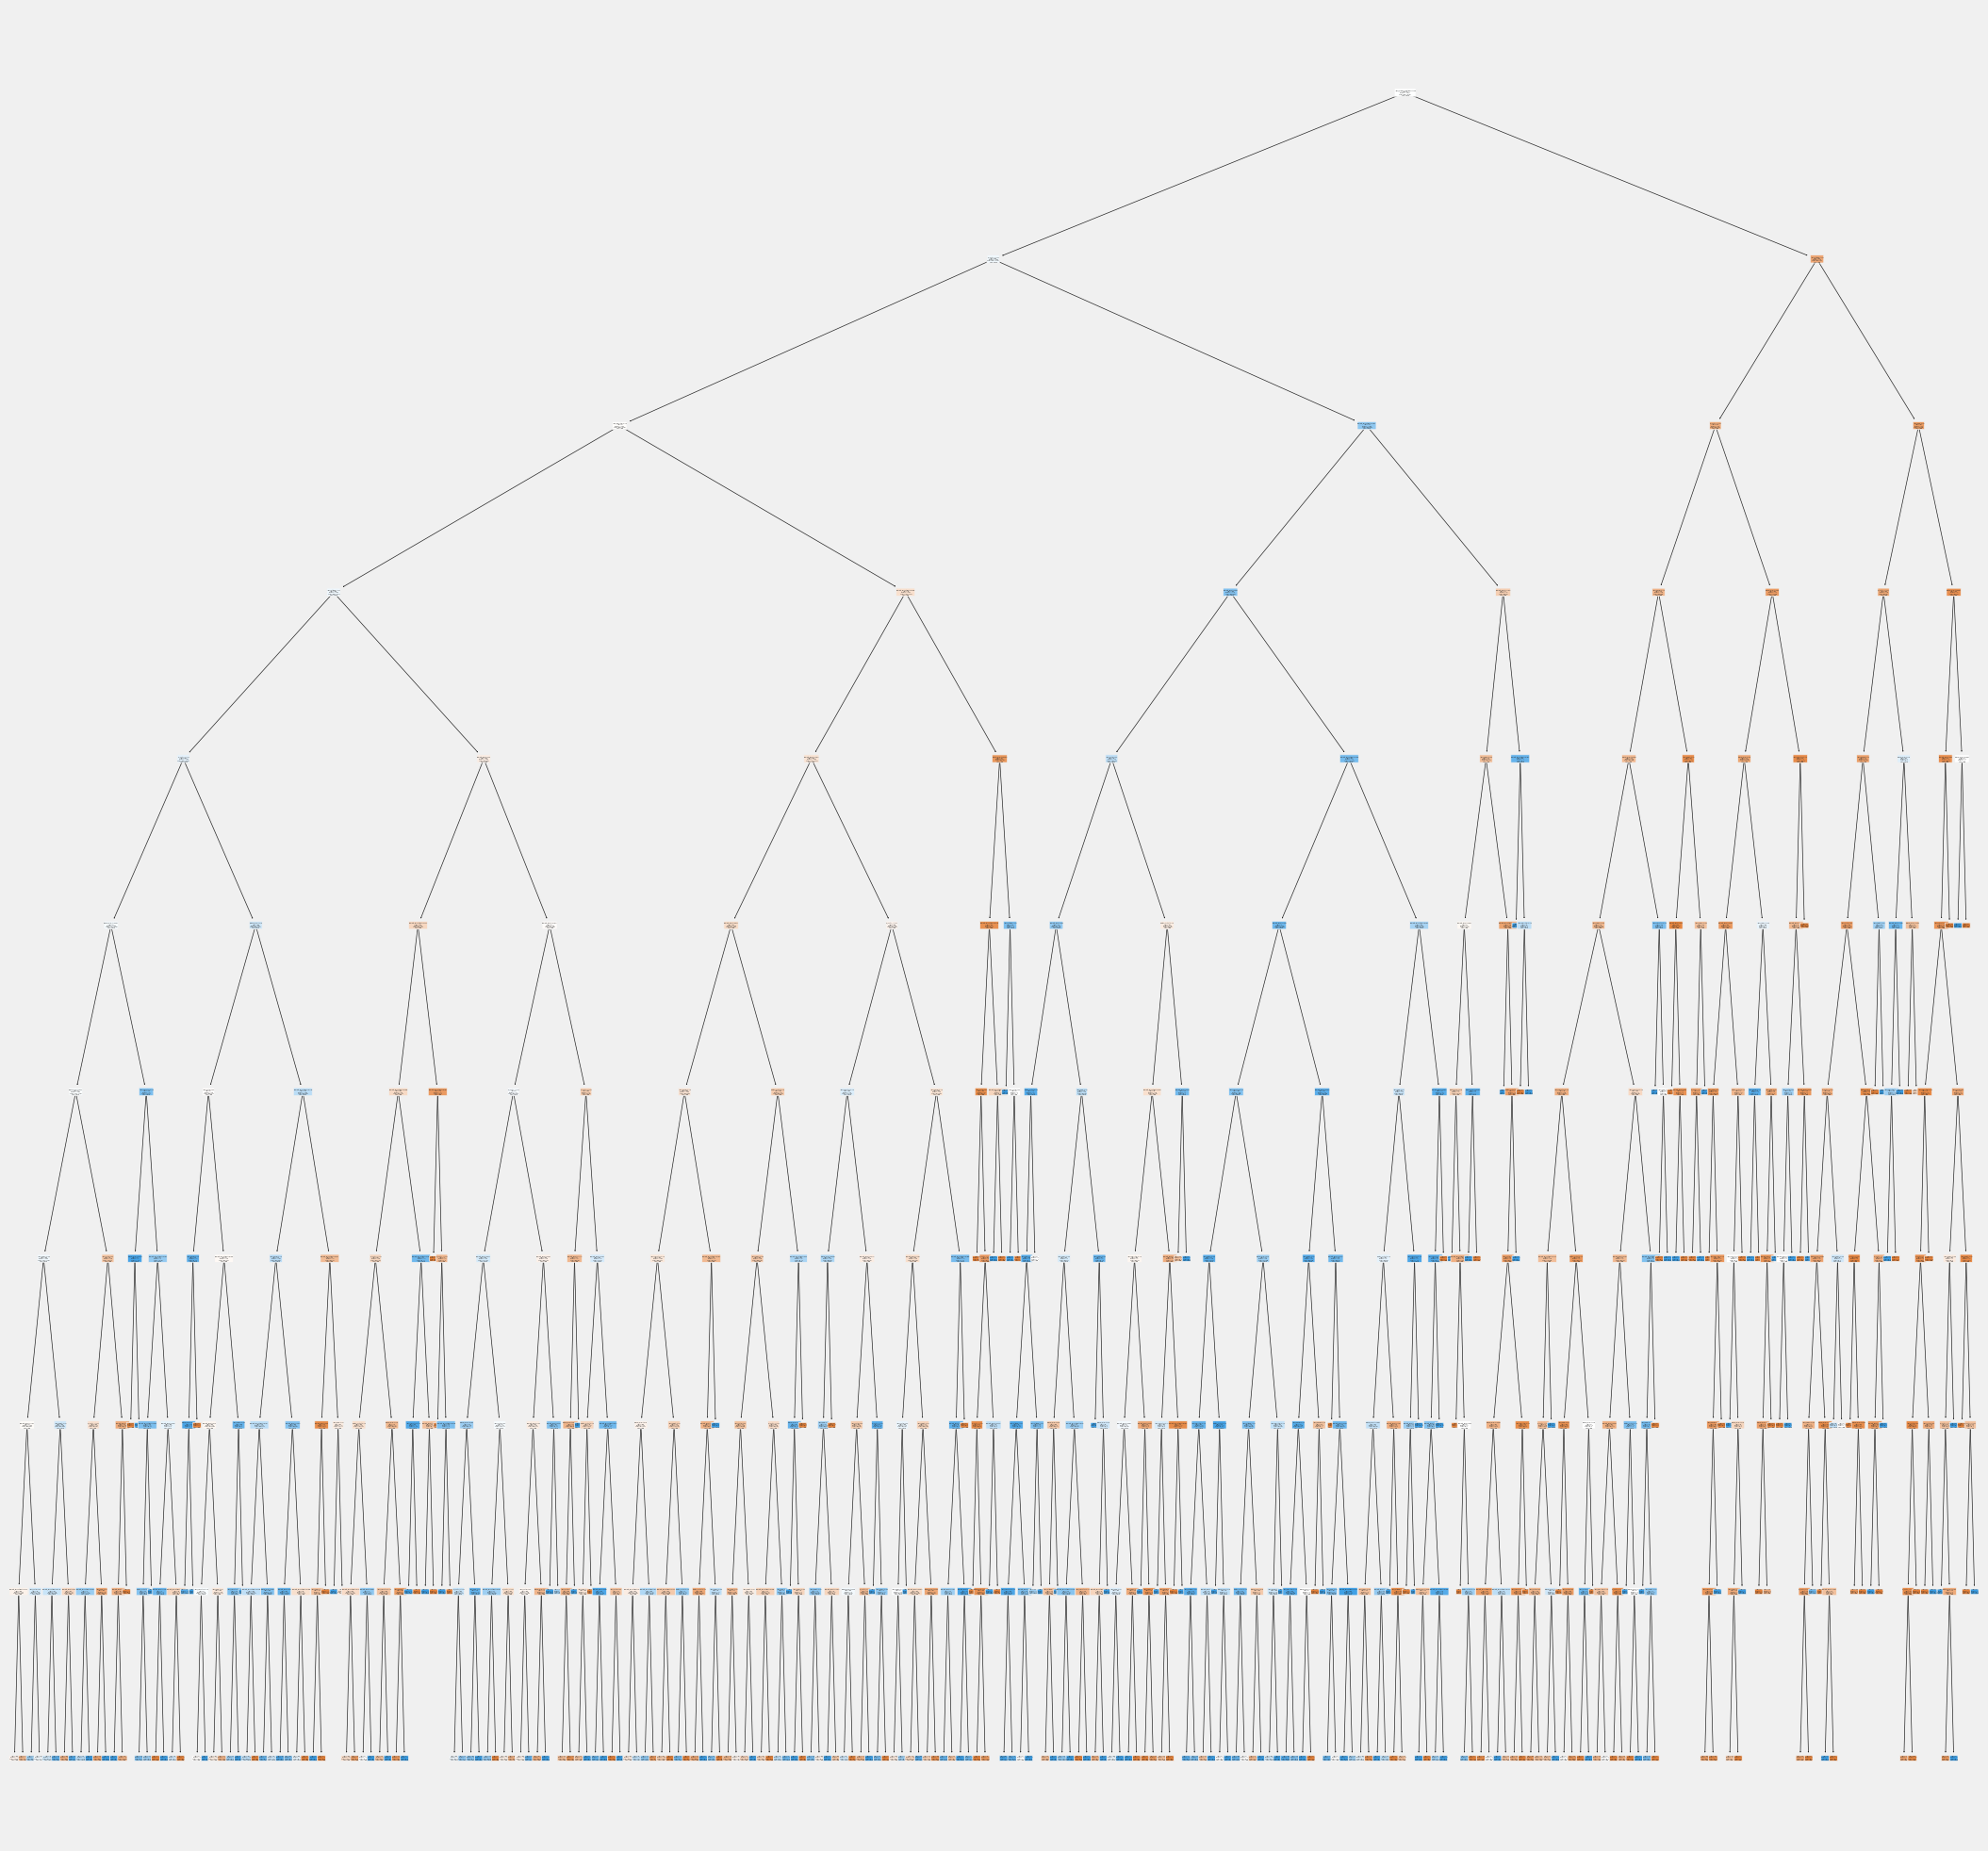

In [12]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6482497634815516

TPR Train :	 0.5653076632691582
TNR Train :	 0.7316009104704098

FPR Train :	 0.2683990895295903
FNR Train :	 0.43469233673084184

Precision:	 0.6261363636363636
Recall:   	 0.7316009104704098
F1-score :	 0.674772568229531


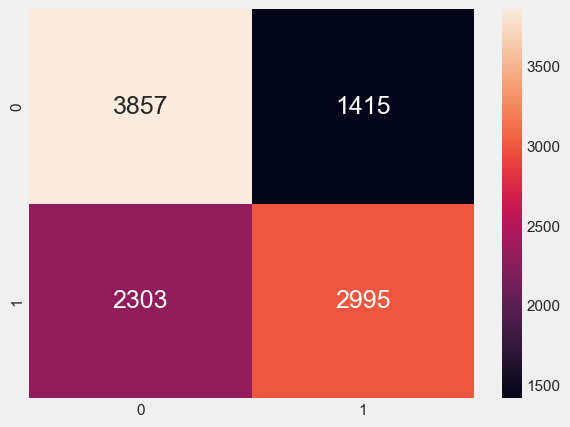

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.617439293598234

TPR Test :	 0.5373001776198935
TNR Test :	 0.6966637401229149

FPR Test :	 0.3033362598770852
FNR Test :	 0.4626998223801066

Precision:	 0.603651578546976
Recall:   	 0.6966637401229149
F1-score :	 0.6468310576727125


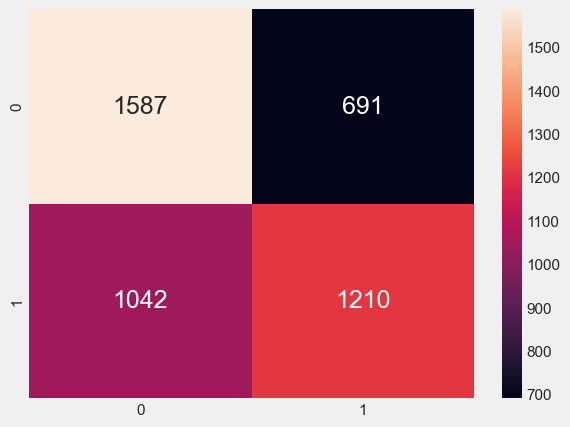

In [14]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['balanced_sampled'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]


### Overview Visualization of Results

In [15]:
table

,original,oversampled,balanced_sampled
recall,0.181364,0.531019,0.696664
precision,0.539604,0.537442,0.603652
accuracy,0.664372,0.600932,0.617439
fscore,0.271482,0.534211,0.646831


In [16]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.8])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

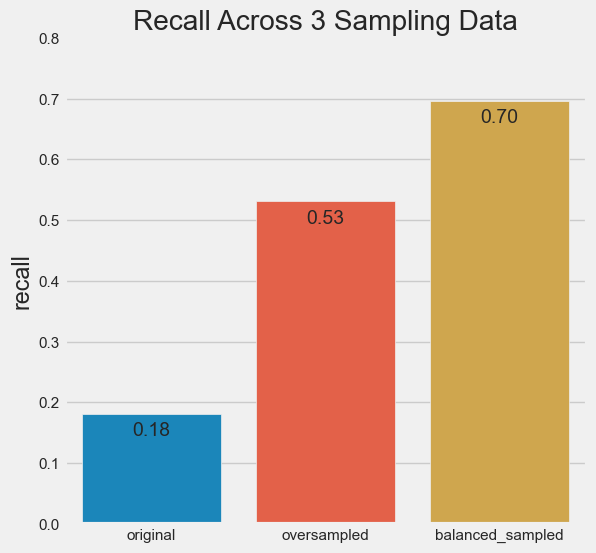

In [17]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

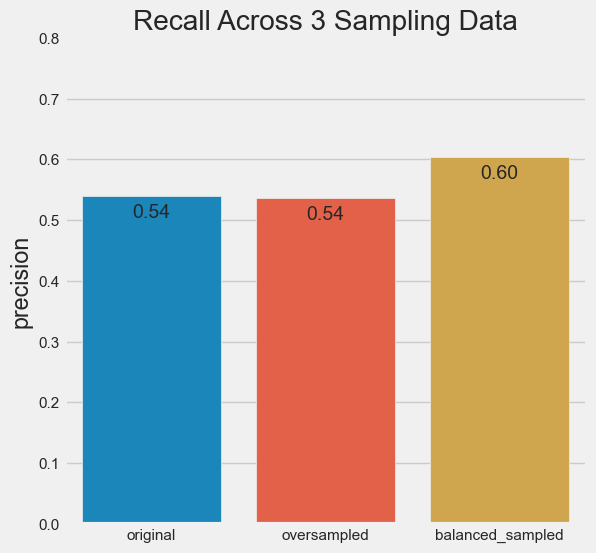

In [18]:
draw_figure(table,1,"Recall Across 3 Sampling Data")

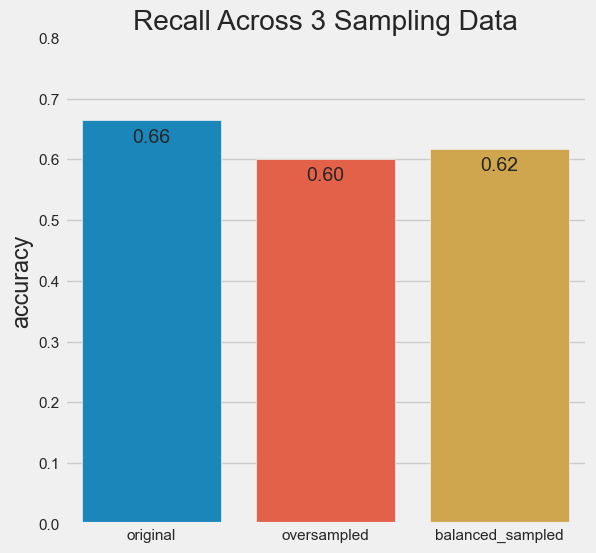

In [19]:
draw_figure(table,2,"Recall Across 3 Sampling Data")

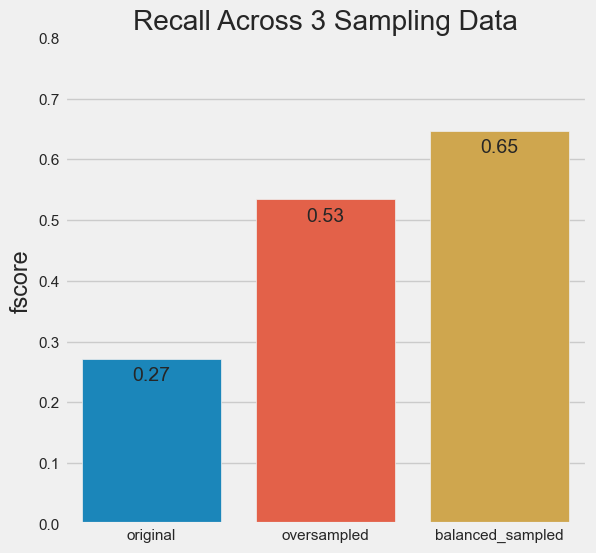

In [20]:
draw_figure(table,3,"Recall Across 3 Sampling Data")